In [1]:
import pandas as pd
import numpy as np

In [2]:
### Problem Statement - If a person will be diabetic or not.

In [227]:
# Here we convert the csv data into a dataframe
df = pd.read_csv('diabetes.csv')
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# No columns need to be dropped as per the domain knowledge all the columns are essential 

In [5]:
df.shape

(768, 9)

The dataset has 768 rows and 9 columns.

In [6]:
## Identifying the dependent and the independent columns
x = df.iloc[:,:8]
y = df.iloc[:,8]

In [7]:
display(x)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


The independent variables are - pregnant, glucose, bp, skin, insulin, bmi, pedigree and age. These factors are independent as they affect the dependent variable

In [8]:
display(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 768, dtype: int64

The dependent variable is label. It is dependent on the other variables. This is the varaible which is being predicted and is the target variable. 0 says that the person does not have diabetes whereas 1 says the person has diabetes. This is categorical variable hence it tells that we have to perform classification.

In [195]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=0)

We divide the data into training and testing data. 80 percent of data is used to train the model whereas 20 percent is used to test the accuracy of the model.

In [196]:
X_train

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
603,7,150,78,29,126,35.2,0.692,54
118,4,97,60,23,0,28.2,0.443,22
247,0,165,90,33,680,52.3,0.427,23
157,1,109,56,21,135,25.2,0.833,23
468,8,120,0,0,0,30.0,0.183,38
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
192,7,159,66,0,0,30.4,0.383,36
629,4,94,65,22,0,24.7,0.148,21
559,11,85,74,0,0,30.1,0.300,35


There are 614 rows in the training dataset

In [197]:
X_test

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31
...,...,...,...,...,...,...,...,...
476,2,105,80,45,191,33.7,0.711,29
482,4,85,58,22,49,27.8,0.306,28
230,4,142,86,0,0,44.0,0.645,22
527,3,116,74,15,105,26.3,0.107,24


There are 154 rows in the testing dataset.

In [198]:
y_train

603    1
118    0
247    0
157    0
468    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: label, Length: 614, dtype: int64

In [199]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: label, Length: 154, dtype: int64

We standardize the data to make the results more accurate. This happens because, the range of values is different for each independent variables and the distance between points increase. After standardizing the values are between -1 and 1.

In [229]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [230]:
X_train

array([[ 0.90832902,  0.91569367,  0.44912368, ...,  0.37852648,
         0.67740401,  1.69955804],
       [ 0.03644676, -0.75182191, -0.47230103, ..., -0.50667229,
        -0.07049698, -0.96569189],
       [-1.12606292,  1.38763205,  1.06340683, ...,  2.54094063,
        -0.11855487, -0.88240283],
       ...,
       [ 0.03644676, -0.84620959, -0.21634972, ..., -0.94927168,
        -0.95656442, -1.04898095],
       [ 2.0708387 , -1.12937261,  0.24436264, ..., -0.26640405,
        -0.50001442,  0.11706589],
       [ 0.32707418,  0.47521786,  0.65388473, ..., -4.07275877,
         0.52121586,  2.94889395]])

# Why did we use KNN Classification?
We use KNN because - 
i) KNN is a supervised learning algorithm.The dataset which we want to predict is there in the dataset so we need to use a supervised learning algorithm. 
ii) The target variable is categorical. Hence, we apply classification.

In [233]:
# We call the KNN Classifier model and define the parameters
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 67,metric='euclidean')

In [234]:
# We fit the training data into the model
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=67)

In [235]:
# We check the accuracy and at this step the algorithm actually performs calculation. Hence it is called lazy learning model.
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\DRITI SINGHANIA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8181818181818182

In [236]:
# We call the KNN Classifier model and define the parameters
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 67,metric='minkowski')
knn.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\DRITI SINGHANIA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8181818181818182

In [237]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 67,metric='hamming')
knn.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\DRITI SINGHANIA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7012987012987013

In [239]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 67,metric='manhattan')
knn.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\DRITI SINGHANIA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7857142857142857

C:\Users\DRITI SINGHANIA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DRITI SINGHANIA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

C:\Users\DRITI SINGHANIA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DRITI SINGHANIA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

C:\Users\DRITI SINGHANIA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DRITI SINGHANIA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

C:\Users\DRITI SINGHANIA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DRITI SINGHANIA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

C:\Users\DRITI SINGHANIA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DRITI SINGHANIA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

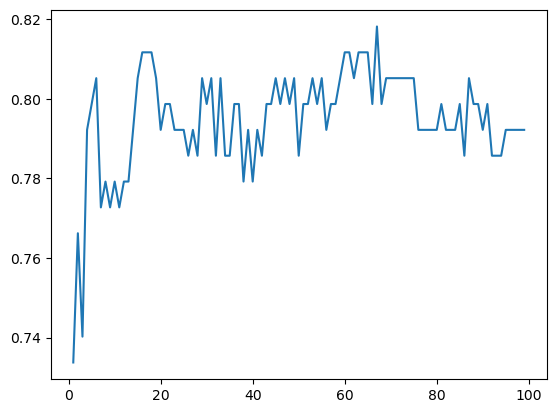

In [240]:
scores = []
for i in range(1,100):
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train,y_train)
    y_pred = kn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

import matplotlib.pyplot as plt
plt.plot(range(1,100),scores)

In [219]:
scores = []
for i in range(60,70):
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train,y_train)
    y_pred = kn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

C:\Users\DRITI SINGHANIA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DRITI SINGHANIA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

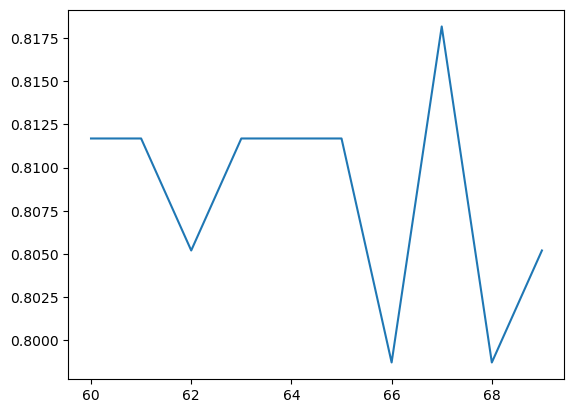

In [220]:
import matplotlib.pyplot as plt
plt.plot(range(60,70),scores)

# Why do we choose the value of k as 67?
We plotted a graph for different i from 1 to 100 and their accuracy levels. We see that the peak is between 60 to 70. Hence we plot a graph for the i ranging from 60 to 70. After that we see that the highest accuaracy is at 67.

# Types of distance measurements and their accuracy levels.

### Hamming - 
This gives the least accuracy of 70%. Hamming distance is used for binary date whereas the independent variables in this dataset were not binary.

### Manhattan - 
It gives an accuracy of 78% which is the second least accuracy. This is because the data is sparse yet the independent variables are not ordinal or categorical.

### Minkowski - 
It gives an accuracy of 81% which is the highest. This is more accurate because the data was sparse and the independent variables had numerical values.

### Euclidean - 
It gives an accuracy of 81% which is the highest. This is more accurate because the independent variables are independent.

# Making the decision boundary

In [241]:
# Decision boundary can only be made on 2 dimensions. To make the decision boundaries we reduce the dimensions of the dataset to
# two dimensions. We use the concept of PCA (Principal Component Analysis) to do so.
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
knn.fit(X_train2, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=67)

In [242]:
# We need to convert everything to numpy array as plot_decision_regions function only takes numpy array as its parameter.
y_train = np.array(y_train)

C:\Users\DRITI SINGHANIA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


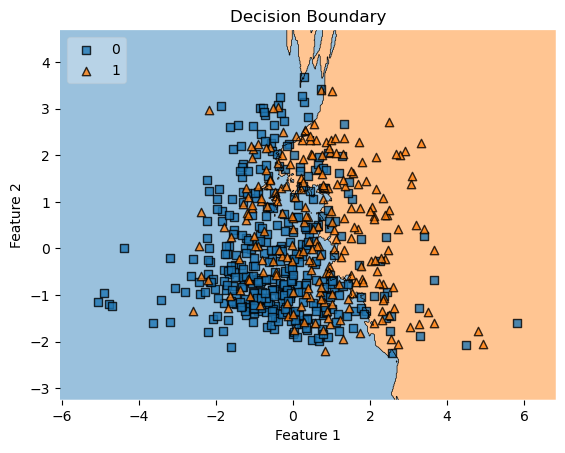

In [223]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train2, y_train, clf = knn, legend = 2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary")
plt.show()

The decision boundary is not a straight line. Hence the dataset is non - linearly separable dataset